# Final Project Proposal: Population & Poverty Trends in the US

### Team Members

- Alexander Schmig
- Jacob Shaw

## Abstract

This project’s goal is to present visualizations to show trends in population growth by age and
sex (hence referred to as population rate) and in poverty by county in the United States, and to
show their relationship and correlation (or lack thereof). Our proposal will cover the datasets we
will be utilizing, the hypotheses we are seeking to answer, and the visualizations we will be
creating to represent the data and to answer those hypotheses.

# Introduction

The reason we want to analyze this data is to show if there are any correlations between
population rates and poverty rates in the last 10 years since the most recent dataset made
available (that being data for the year 2022). The intended purpose of our project is to display
the trends of population rate variations in counties alongside the poverty rate trend variations in
the same counties. With this information, we hope to answer with significant confidence the null
hypothesis that there is no correlation between population rates and poverty rates; or answer
with significant confidence the alternative hypothesis, that there is some significant correlation
between population rates and poverty rates.

The visualizations found while researching this topic were focused more on poverty exclusively
([here[1]](https://ourworldindata.org/poverty) and [here[2]](https://www.visualcapitalist.com/visualizing-poverty-rate-u-s-states/)) or were global-focused where the intent was to focus on country-wide
poverty rates. The United States Census Bureau, where we found our datasets, provides a
source of several visualizations based on these datasets ([here [3]](https://www.census.gov/topics/income-poverty/library/visualizations.html)). The visualizations widely
vary, looking at childhood poverty to women's earnings to measuring the nation's social and
economic well-being. With all of these visualizations not quite covering population and poverty
rates, I find that our visualization will contribute new information to this area of research.

### Existing Work

There are some visualizations similar to our study on the [US Census](https://www.census.gov/library/visualizations/2023/demo/2022-state-county-maps.html) website. Most notably, the poverty rate of population under 18 showing county rates. We originally attempted this, but it would look like there are a lot of counties without poverty, just because they do not have enough data on those counties to determine a rate. So, we went with state rates instead.

A more similar study is shown [here](https://www.visualcapitalist.com/visualizing-poverty-rate-u-s-states/), with a map of poverty for the statues, with some showing of over the years.

## Questions And Objectives

Our visualizations will be both geographic and tabular. There will be two geographic maps, one
to show the median poverty rate differences from 2012-2022 and the other to show median
population rate differences from 2012-2022. Accompanying these maps will be tabular graphs
(or possibly bar graphs if deemed more visually effective) which show the top counties that have
either:

### Objectives 1

1. Is there a relationship/correlation between poverty growth and population growth

### Objectives 2

1. High poverty and high population rates

2. High poverty and low population rates

3. Low poverty and high population rates

4. Low poverty and low population rates

We define “high” rates as a positive value, and “low” rates as either 0% change or negative
values. Population rates are generally preferred to be positive as that means there will be more
children born and people who have moved into the area than people who have died and those
who no longer live in the area. Similarly for poverty, we define a “high” rate as an increase of
individuals who fall below the poverty line as defined by the federal government in that area
over time and “low” rates as a decrease in individuals within the area who fall below the poverty
line.

Another objective is to view the correlation between the rate of poverty and rate of population.
Does there appear to be strong correlation (positive or negative) or is there a lack of relationship
(zero correlation). More specifically,


# Process

## Data Processing

In [18]:
import pandas as pd

path = "2010_2022_pov_data.csv"
df = pd.read_csv(path, low_memory=False)
df.head()

,GEO_ID,NAME,S1701_C01_001E,S1701_C01_001M,S1701_C02_001E,S1701_C02_001M,S1701_C03_001E,S1701_C03_001M,S1701_C01_002E,S1701_C01_002M,...,S1701_C03_061E,S1701_C03_061M,Unnamed: 368,S1701_C01_062E,S1701_C01_062M,S1701_C02_062E,S1701_C02_062M,S1701_C03_062E,S1701_C03_062M,Unnamed: 374
0,0500000US01003,"Baldwin County, Alabama",180686,985,23610,4573,13.1,2.5,41865,592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0500000US01015,"Calhoun County, Alabama",116553,1987,29082,4105,25.0,3.4,26847,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01043,"Cullman County, Alabama",79692,834,16848,3811,21.1,4.8,18892,588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01049,"DeKalb County, Alabama",70453,682,13788,4362,19.6,6.2,18233,460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01051,"Elmore County, Alabama",72069,3261,7923,2292,11.0,3.1,18189,306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# selecting and renaming columns of interest
columns_renamed = {
                    'NAME': 'NAME',
                    'S1701_C01_001E': 'total_pop',
                    'S1701_C02_001E': 'below_pov',
                    'S1701_C01_002E': 'total_under_18',
                    'S1701_C02_002E': 'below_pov_under_18',
                    'S1701_C01_004E': 'total_18_to_64',
                    'S1701_C02_004E': 'below_pov_18_to_64',
                    'S1701_C01_005E': 'total_over_64',
                    'S1701_C02_005E': 'below_pov_over_64',
                    'S1701_C01_006E': 'total_male',
                    'S1701_C02_006E': 'below_pov_male',
                    'S1701_C01_007E': 'total_female',
                    'S1701_C02_007E': 'below_pov_female',
                    'YEAR': 'YEAR'}
df = df.rename(columns=columns_renamed)[columns_renamed.values()]
df.head()

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,below_pov_male,total_female,below_pov_female,YEAR
0,"Baldwin County, Alabama",180686,23610,41865,8091,109204,13958,29617,1561,88311,8822,92375,14788,2010
1,"Calhoun County, Alabama",116553,29082,26847,9137,73074,18319,16632,1626,55830,11527,60723,17555,2010
2,"Cullman County, Alabama",79692,16848,18892,5543,48175,10051,12625,1254,39438,7604,40254,9244,2010
3,"DeKalb County, Alabama",70453,13788,18233,5609,42707,7109,9513,1070,35219,6769,35234,7019,2010
4,"Elmore County, Alabama",72069,7923,18189,2707,45045,4698,8835,518,34368,4073,37701,3850,2010


In [20]:
df["total_pov_ratio"] = df["below_pov"] / df["total_pop"]
df["under_18_pov_ratio"] = df["below_pov_under_18"] / df["total_under_18"]
df["18_to_64_pov_ratio"] = df["below_pov_18_to_64"] / df["total_18_to_64"]
df["male_pov_ratio"] = df["below_pov_male"] / df["total_male"]
df["female_pov_ratio"] = df["below_pov_female"] / df["total_female"]
df.head()

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,below_pov_male,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio
0,"Baldwin County, Alabama",180686,23610,41865,8091,109204,13958,29617,1561,88311,8822,92375,14788,2010,0.130669,0.193264,0.127816,0.099897,0.160087
1,"Calhoun County, Alabama",116553,29082,26847,9137,73074,18319,16632,1626,55830,11527,60723,17555,2010,0.249517,0.340336,0.250691,0.206466,0.289100
2,"Cullman County, Alabama",79692,16848,18892,5543,48175,10051,12625,1254,39438,7604,40254,9244,2010,0.211414,0.293405,0.208635,0.192809,0.229642
3,"DeKalb County, Alabama",70453,13788,18233,5609,42707,7109,9513,1070,35219,6769,35234,7019,2010,0.195705,0.307629,0.166460,0.192197,0.199211
4,"Elmore County, Alabama",72069,7923,18189,2707,45045,4698,8835,518,34368,4073,37701,3850,2010,0.109936,0.148826,0.104296,0.118511,0.102119


## Dataset

We have now refined our dataset and are ready to create visualizations.

This datset is tidy. 

1. Each variable forms a column: Our main variables are the County, Year, and the count of people (total population or count in poverty). Also, the computed columns for population growth and poverty rate growth.

2. Each Observation forms a row: Our observations are a county for a given year, this is satisfied.

3. Each type of observational unit forms a table: Our dataset fundamentally satisfies this requirement

## Distribution

In [23]:
df_yoy = pd.DataFrame()

for name in set(df["NAME"].to_list()):
    # creating copy to fully separate dataframes
    dt = df[df["NAME"] == name].copy()
    # this works because we loaded and added data to the dataset 
    # in order of oldest to newest
    dt["total_pop_yoy"] = dt["total_pop"].pct_change(periods=1)
    dt["total_pov_ratio_yoy"] = dt["total_pov_ratio"].pct_change(periods=1)
    df_yoy = pd.concat([df_yoy, dt])
df_yoy.head()

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,...,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio,total_pop_yoy,total_pov_ratio_yoy
622,"Providence County, Rhode Island",596396,105257,136064,33318,380671,63714,79661,8225,287466,...,308930,56207,2010,0.176488,0.244870,0.167373,0.170629,0.181941,NaN,NaN
1443,"Providence County, Rhode Island",600090,110483,133299,35422,386876,64574,79915,10487,289145,...,310945,65305,2011,0.184111,0.265733,0.166911,0.156247,0.210021,0.006194,0.043189
2268,"Providence County, Rhode Island",602402,102191,133182,33506,387230,58879,81990,9806,291196,...,311206,56738,2012,0.169639,0.251581,0.152052,0.156091,0.182317,0.003853,-0.078602
3096,"Providence County, Rhode Island",601768,111704,130541,38634,387974,64338,83253,8732,293228,...,308540,60014,2013,0.185626,0.295953,0.165831,0.176279,0.194510,-0.001052,0.094242
3924,"Providence County, Rhode Island",606305,109659,131974,33841,388991,65453,85340,10365,293922,...,312383,61543,2014,0.180864,0.256422,0.168264,0.163703,0.197011,0.007539,-0.025653


### Poverty Ratio

One of the most interesting columns we have to look at is the poverty rate. We used the Freedman-Diaconis rule, as the dataset is large enough for this to be reasonable, but it also more flexible with deviations from the normal distributions. 

Here, we see the distribution to be slightly right skewed, but somewhat normal overall. This somewhat makes sense, as we know that income is right skewed, which seems reasonable for poverty to also be right skewed, since poverty and income are obviously related. 

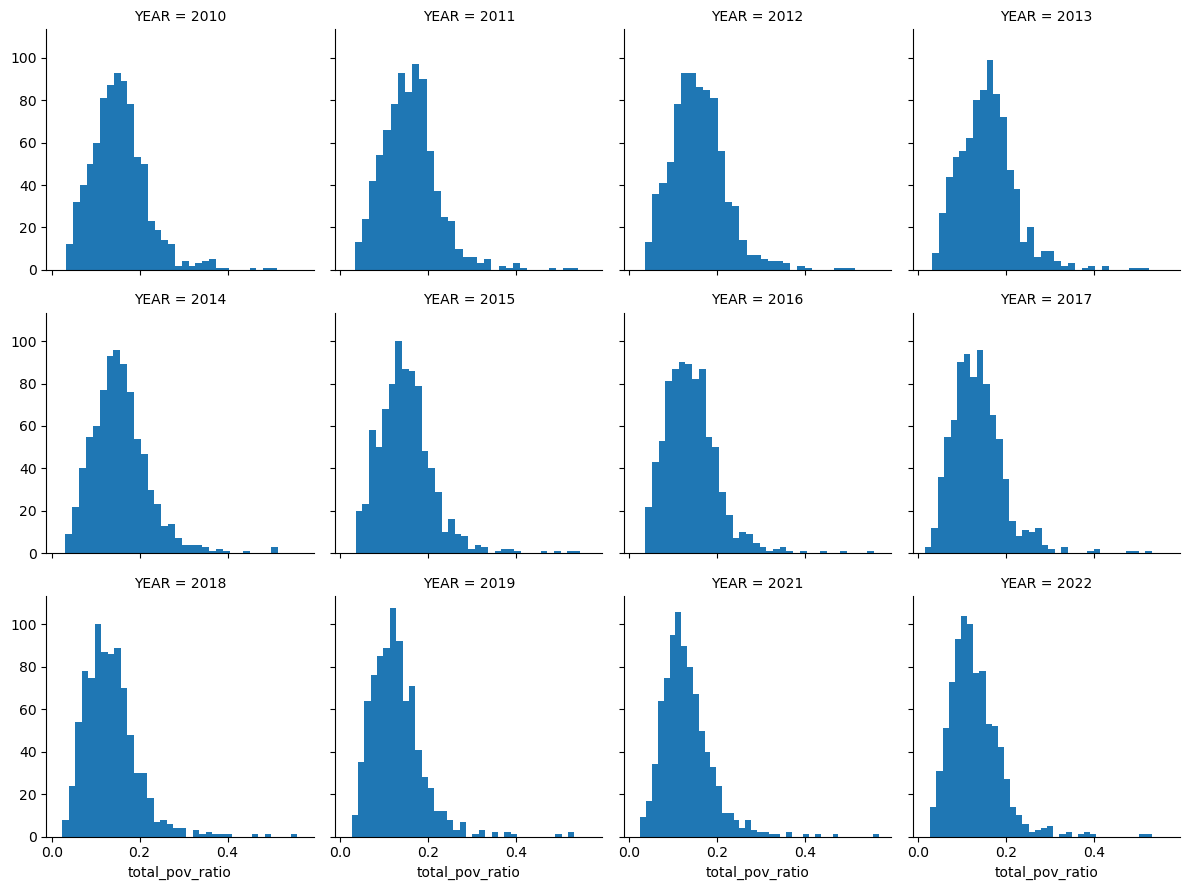

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def hist(x, **kwargs):
    plt.hist(x, **kwargs)
    plt.xticks()
h = sns.FacetGrid(df_yoy, col="YEAR", col_wrap=4)
h.map(hist, "total_pov_ratio", bins="fd")

# Visualizations

Text(0.5, 1.0, 'Population Growth VS Poverty Rate Year over Year')

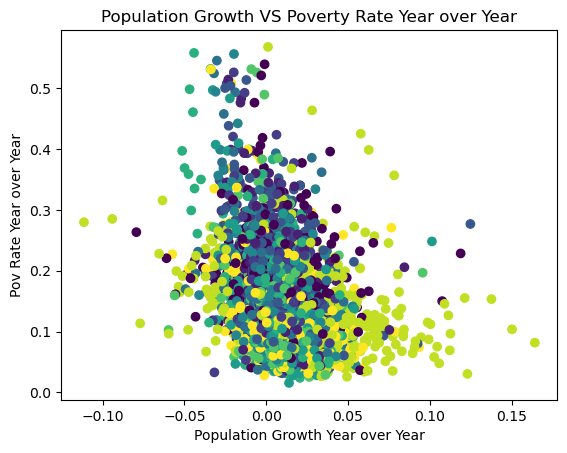

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(
    x=(df_yoy["total_pop_yoy"]), 
    y=(df_yoy["total_pov_ratio"]),
    c=(df_yoy["YEAR"])
)
plt.xlabel("Population Growth Year over Year")
plt.ylabel("Pov Rate Year over Year")
plt.title("Population Growth VS Poverty Rate Year over Year")

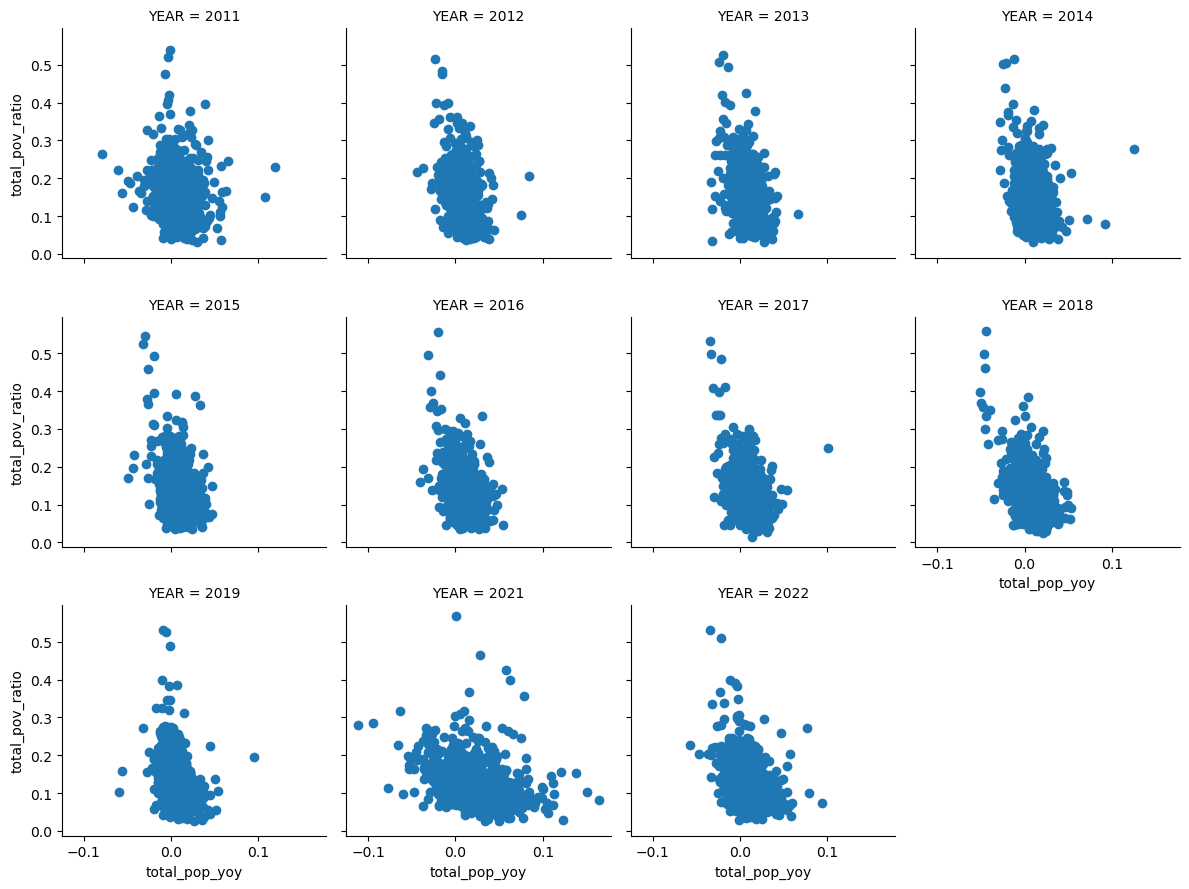

In [28]:
import seaborn as sns
df_yoy_t = df_yoy[df_yoy["YEAR"] != 2010]
g = sns.FacetGrid(df_yoy_t, col="YEAR", col_wrap=4)
g = g.map(plt.scatter, "total_pop_yoy", "total_pov_ratio")

These visualization appears to show no clear relationship between the population growth vs poverty growt, as the plot appears as a blob. 

When looking at each year individually, we still end up with no clear relationship coming through. 

Based on both of these plots, I think we can call this a failed Experiment.

In [30]:
df_yoy

,NAME,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,total_male,...,total_female,below_pov_female,YEAR,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio,total_pop_yoy,total_pov_ratio_yoy
622,"Providence County, Rhode Island",596396,105257,136064,33318,380671,63714,79661,8225,287466,...,308930,56207,2010,0.176488,0.244870,0.167373,0.170629,0.181941,NaN,NaN
1443,"Providence County, Rhode Island",600090,110483,133299,35422,386876,64574,79915,10487,289145,...,310945,65305,2011,0.184111,0.265733,0.166911,0.156247,0.210021,0.006194,0.043189
2268,"Providence County, Rhode Island",602402,102191,133182,33506,387230,58879,81990,9806,291196,...,311206,56738,2012,0.169639,0.251581,0.152052,0.156091,0.182317,0.003853,-0.078602
3096,"Providence County, Rhode Island",601768,111704,130541,38634,387974,64338,83253,8732,293228,...,308540,60014,2013,0.185626,0.295953,0.165831,0.176279,0.194510,-0.001052,0.094242
3924,"Providence County, Rhode Island",606305,109659,131974,33841,388991,65453,85340,10365,293922,...,312383,61543,2014,0.180864,0.256422,0.168264,0.163703,0.197011,0.007539,-0.025653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,"Forsyth County, Georgia",227047,12732,63230,4008,49603,2675,63230,4008,137575,...,38289,2402,2017,0.056076,0.063388,0.053928,0.049275,0.062733,0.031038,-0.050172
6787,"Forsyth County, Georgia",235749,12051,64503,3573,50441,2698,64277,3400,143074,...,39558,2724,2018,0.051118,0.055393,0.053488,0.050869,0.068861,0.038327,-0.088425
7626,"Forsyth County, Georgia",243387,10570,65178,3493,51256,2356,64736,3279,147918,...,40781,1627,2019,0.043429,0.053592,0.045965,0.034141,0.039896,0.032399,-0.150420
8467,"Forsyth County, Georgia",259214,14506,67859,4430,53878,3776,67659,4302,159519,...,43937,2676,2021,0.055961,0.065282,0.070084,0.050207,0.060905,0.065028,0.288581


In [31]:
df_yoy[['County', 'State']] = df_yoy['NAME'].str.split(', ',expand=True)

In [32]:
# Code found here:
# https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
#abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [33]:
df_yoy['State Abrv'] = df_yoy['State'].apply(lambda x: us_state_to_abbrev[x])

In [34]:
df_yoy.columns

Index(['NAME', 'total_pop', 'below_pov', 'total_under_18',
       'below_pov_under_18', 'total_18_to_64', 'below_pov_18_to_64',
       'total_over_64', 'below_pov_over_64', 'total_male', 'below_pov_male',
       'total_female', 'below_pov_female', 'YEAR', 'total_pov_ratio',
       'under_18_pov_ratio', '18_to_64_pov_ratio', 'male_pov_ratio',
       'female_pov_ratio', 'total_pop_yoy', 'total_pov_ratio_yoy', 'County',
       'State', 'State Abrv'],
      dtype='object')

# Fixing the "Over 64 Age Range" Columns
In these two columns, there exists a letter "N", which is used by the USCB to denote that a sample size was too small to estimate with any amount of measureable accuracy.  As such, I will be replacing these values with 0.

We can see that these two columns are the only two that we would expect to be numeric, yet they are still object types.

In [36]:
df_yoy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 622 to 9309
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME                 9986 non-null   object 
 1   total_pop            9986 non-null   int64  
 2   below_pov            9986 non-null   int64  
 3   total_under_18       9986 non-null   int64  
 4   below_pov_under_18   9986 non-null   int64  
 5   total_18_to_64       9986 non-null   int64  
 6   below_pov_18_to_64   9986 non-null   int64  
 7   total_over_64        9986 non-null   object 
 8   below_pov_over_64    9986 non-null   object 
 9   total_male           9986 non-null   int64  
 10  below_pov_male       9986 non-null   int64  
 11  total_female         9986 non-null   int64  
 12  below_pov_female     9986 non-null   int64  
 13  YEAR                 9986 non-null   int64  
 14  total_pov_ratio      9986 non-null   float64
 15  under_18_pov_ratio   9986 non-null   floa

In [37]:
df_yoy['total_over_64'] = df_yoy['total_over_64'].replace("N", 0).astype(int)

In [38]:
df_yoy['below_pov_over_64'] = df_yoy['below_pov_over_64'].replace("N", 0).astype(int)

In [39]:
import plotly.graph_objects as go

def country_graph_single_year(dataframe, x_variable, Title):
    year = dataframe['YEAR'].unique()[0]
    
    fig = go.Figure(data = go.Choropleth(
        locations = dataframe['State Abrv'],
        z = x_variable, 
        #z = df_yoy_2022['total_pov_ratio'], # replace with X variable
        locationmode = 'USA-states', 
        colorscale = 'Reds',
        colorbar_title = "Percent",
    ))
    
    fig.update_layout(
        title_text = f'{Title} in {year}',
        geo_scope='usa', 
        width=1100,
        height=800
    )
    
    fig.show()

### State-and-Year-based Grouping
In order to proceed to visualizations, the last step is to group our numeric data by both State Abbreviation and Year using the aggregate of sum.

We also must remove the "ratio" columns since they were calculated on the larger-scale County-level data.  Once they are remover, we will remake them for State-level data.

Additionally, we also remove Puerto Rico from our rows since we are only focused on states and Washington, D.C. for this project.

In [41]:
ratio_list = [x for x in df_yoy.columns.to_list() if 'ratio' in x]

In [42]:
df_states = df_yoy.drop(columns = ['NAME','County','State']+ratio_list)
df_states = df_states.groupby(by = ['State Abrv', 'YEAR'], as_index = False).sum()

In [130]:
df_states["total_pov_ratio"] = df_states["below_pov"] / df_states["total_pop"]

df_states["under_18_pov_ratio"] = df_states["below_pov_under_18"] / df_states["total_under_18"]
df_states["18_to_64_pov_ratio"] = df_states["below_pov_18_to_64"] / df_states["total_18_to_64"]
df_states["over_64_pov_ratio"] = df_states["below_pov_over_64"] / df_states["total_over_64"]

df_states["male_pov_ratio"] = df_states["below_pov_male"] / df_states["total_male"]
df_states["female_pov_ratio"] = df_states["below_pov_female"] / df_states["total_female"]

In [132]:
df_states = df_states[df_states['State Abrv'] != 'PR']

In [134]:
df_states

,State Abrv,YEAR,total_pop,below_pov,total_under_18,below_pov_under_18,total_18_to_64,below_pov_18_to_64,total_over_64,below_pov_over_64,...,below_pov_female,total_pop_yoy,total_pov_ratio,under_18_pov_ratio,18_to_64_pov_ratio,male_pov_ratio,female_pov_ratio,total_genders,total_gender_div_total_pop,over_64_pov_ratio
0,AK,2010,467845,41812,124630,14286,310592,25542,32623,1984,...,22735,0.000000,0.089371,0.114627,0.082237,0.080174,0.098890,467845,1.000000,0.060816
1,AK,2011,474913,42967,124699,16270,313564,24791,36650,1906,...,24289,0.055152,0.090473,0.130474,0.079062,0.078113,0.103008,474913,1.000000,0.052005
2,AK,2012,481278,39999,124414,13797,318459,24646,38405,1556,...,21147,0.039689,0.083110,0.110896,0.077391,0.076960,0.089485,481278,1.000000,0.040516
3,AK,2013,483411,35038,124112,9857,318444,23319,40855,1862,...,19201,0.016460,0.072481,0.079420,0.073228,0.063794,0.081652,483411,1.000000,0.045576
4,AK,2014,484272,48015,123311,17622,317292,28508,43669,1885,...,27220,0.010659,0.099149,0.142907,0.089848,0.083557,0.115633,484272,1.000000,0.043166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,WY,2017,173649,17981,41961,4208,29961,2726,41740,3987,...,5223,-0.014330,0.103548,0.100284,0.090985,0.106969,0.134818,144800,0.833866,0.095520
620,WY,2018,173940,14224,40945,4581,29790,3113,40905,4581,...,4297,0.002330,0.081775,0.111882,0.104498,0.075140,0.111077,144315,0.829683,0.111991
621,WY,2019,174767,16154,40935,4995,31340,3919,40477,4537,...,6079,0.011119,0.092432,0.122023,0.125048,0.092436,0.158530,143576,0.821528,0.112088
622,WY,2021,177555,18102,41532,5765,31183,3756,41335,5568,...,4997,0.029956,0.101952,0.138809,0.120450,0.106678,0.130928,144177,0.812013,0.134704


In [136]:
df_states.loc[:, 'total_genders'] = df_states['total_male'] + df_states['total_female']
df_states.loc[:, 'total_gender_div_total_pop'] = df_states['total_genders'] / df_states['total_pop']
df_states['total_gender_div_total_pop'].min()

0.7887865325035398

In [138]:
df_yoy['total_genders'] = df_yoy['total_male'] + df_yoy['total_female']
df_yoy['total_gender_div_total_pop'] = df_yoy['total_genders'] / df_yoy['total_pop']
#df_yoy['total_gender_div_total_pop'][df_yoy['total_gender_div_total_pop'] != 1]

In [140]:
df_yoy.shape

(9986, 26)

From the above analyses, we can see that the male and female total populations are, in fact, estimations that do not always sum up to the state's total population.  The lowest representaiton when male and female populations are combined is 78.8% of the state's total population for that year.  The USCB created these features as estimations using statitstical measurements.  As such, we will proceed using a degree of caution and understanding that these values are estimates only.

### Establish a Map Making Function
Below, we created a function for generating a state-based cloropleth map to reduce the code clutter in our script and make it more legible.

In [144]:
import plotly.graph_objects as go

def country_graph_single_year(dataframe, x_variable, Title, legend_title, color):
    year = dataframe['YEAR'].unique()[0]
    
    fig = go.Figure(data = go.Choropleth(
        locations = dataframe['State Abrv'],
        z = x_variable, 
        #z = df_yoy_2022['total_pov_ratio'], # replace with X variable
        locationmode = 'USA-states', 
        colorscale = color,
        colorbar_title = legend_title,
    ))
    
    fig.update_layout(
        title_text = f'{Title} in {year}',
        geo_scope='usa', 
        width=1100,
        height=800
    )
    
    fig.show()

# Map Visualizations of our Data

In [147]:
df_states_2022 = df_states[df_states['YEAR'] == 2022]

In [149]:
print(f'Estimate of the Total Population of the United States in 2022:\n\n{df_states_2022.total_pop.sum()}\n')

Estimate of the Total Population of the United States in 2022:

278854095



This shows our baseline Total Population estimation is 280,212,845 in the US for 2022.  Compare this with the USCB's official press release estimate of 333,287,557 US residents (reference: https://www.census.gov/newsroom/press-releases/2022/2022-population-estimates.html), and we are not accounting for roughly 50 million persons in our data.  This is because, as written here, the USCB does not account persons living in the following 4 groups:
- Institutional group quarters (such as prisons or nursing homes)
- College dormitories
- Military barracks
- Living situations without conventional housing (and who are not in shelters)

(reference: https://www.census.gov/topics/income-poverty/poverty/guidance/poverty-measures.html)

With that clarification of our data out of the way, let's take a look at the Total Population of each State in the millions.

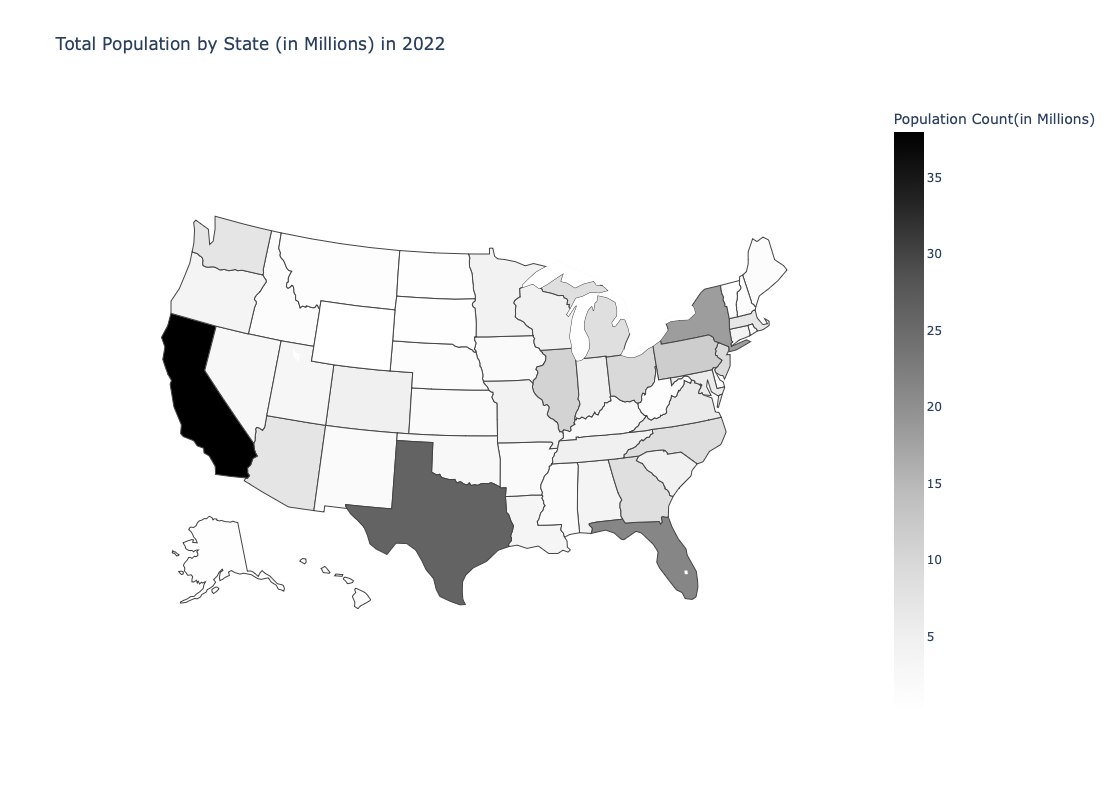

In [152]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['total_pop'].apply(lambda x: np.round(x/1000000, 2)), 
                          'Total Population by State (in Millions)',
                          'Population Count(in Millions)',
                          'Greys')

The total population distributes as we would expect it to, with our top 4 most populated states being:
1. California: 37.9 million
2. Texas: 26.1 million
3. Florida: 21.2 million
4. New York: 18.2 million

Now, bearing all that in mind, let's take a look at the total number of persons belopw the poverty line by state.  We should expect to see a similar proportioanl breakdown if we assume that there is no significant difference between states.

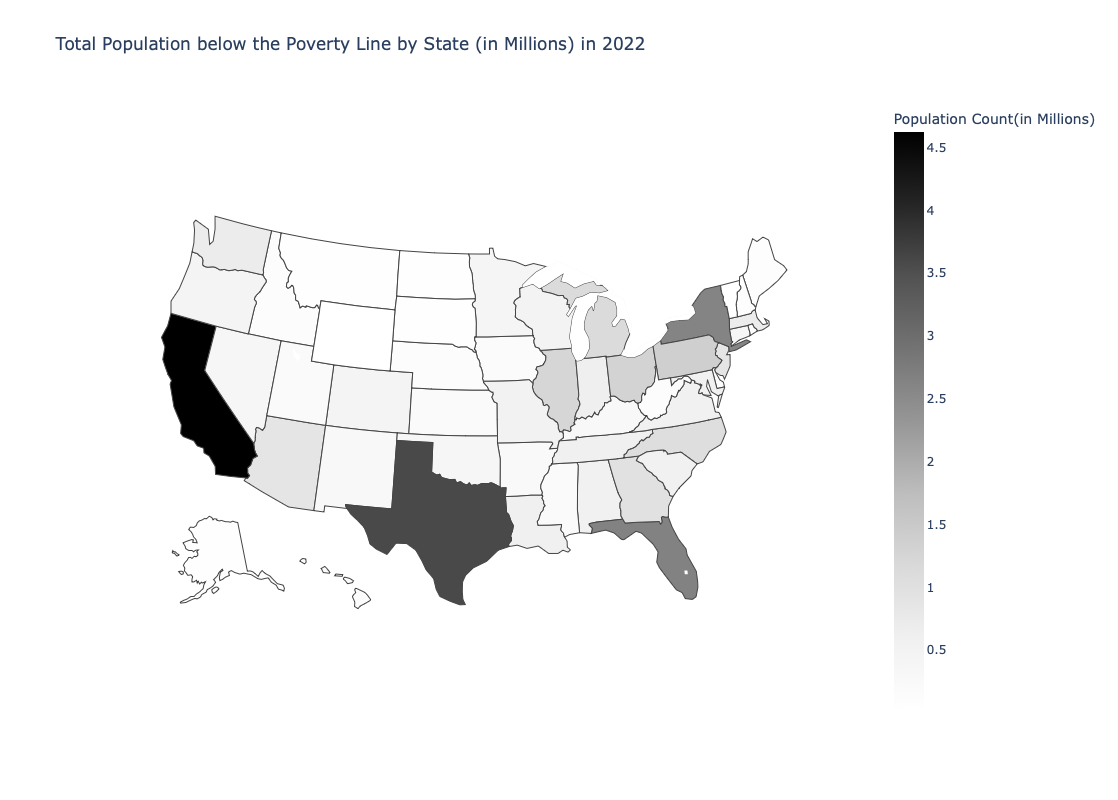

In [158]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['below_pov'].apply(lambda x: np.round(x/1000000, 2)), 
                          'Total Population below the Poverty Line by State (in Millions)',
                          'Population Count(in Millions)',
                          'Greys')

As expected, the same states are the top 4 most populated when accounting only for those below the poverty line.  We can see small shifts in color for the rest of the states, indicating some states have slightly less or more persons below the poverty line.  But it's hard to tell exactly, so let's reframe our data.  In the next map, we'll look at the count of all persons below the poverty line divided by the total number of persons in that state.  This gives us a percentage of those below the poverty line by state.  Assuming complete normality, we would expect each state to be the exact same shade and be equal in their proportions of those below the poverty line.

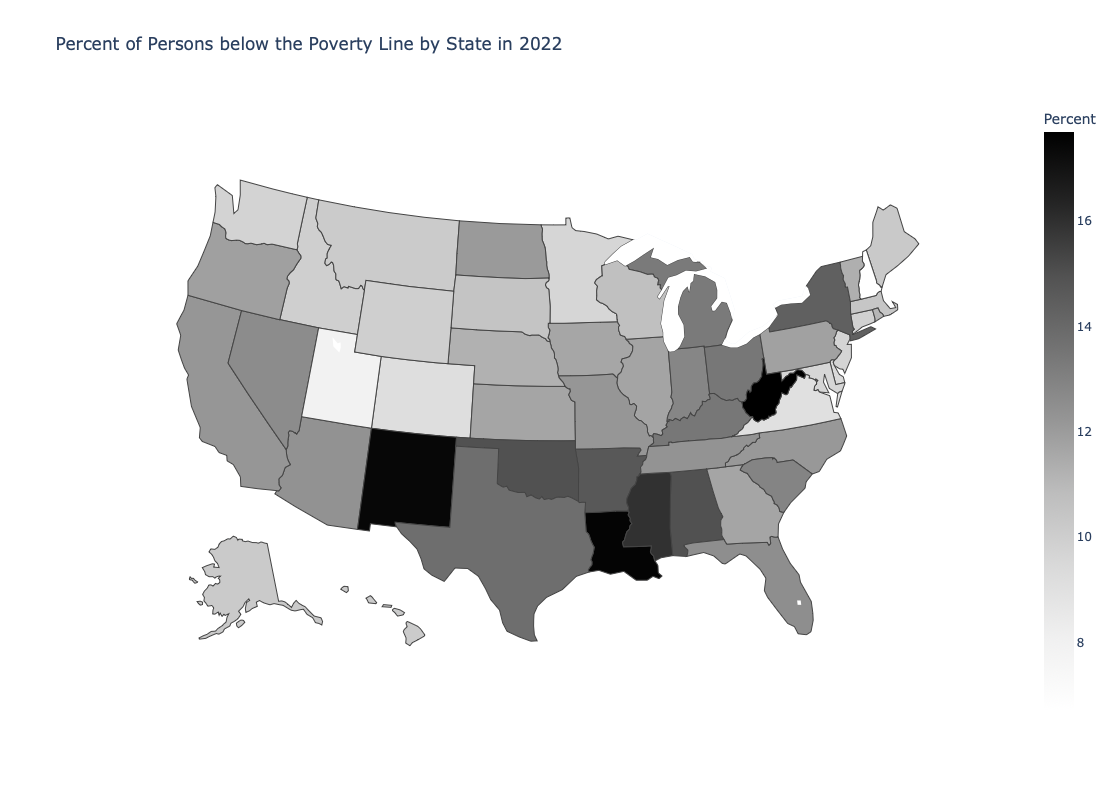

In [161]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['total_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Percent of Persons below the Poverty Line by State',
                          'Percent',
                          'Greys')

Now, we're really seeing some differences.  While it was unsurprising that as a state got more populated, so too did the number of persons below the poverty line, the ratio between the total and those below the poverty line does not match with that at all.  Despite having relatively low populations (given the size of the top four states), West Virginia, Louisiana, and New Mexico are far and away the leaders with the highest percentages of their populations below the poverty line with near-18% of their total populations.  

In contrast, if we look at the top four, this is what we find:
1. California: 12.19%
2. Texas: 13.76%
3. Florida: 12.52%
4. New York: 14.36%

These four states in population size have lower percentages of individuals below the poverty line than the other three states mentioned earlier, which is at least surprising in that we would have expected the rate to be approximately equal across all 50 states.

### Subsets

Let's see if there's more information here by looking at the following sub-sets of the total population:
- Gender (Male and Female)
- Age (under 18, 18 to 64, and over 64)

As we look at each subset, we will be comparing only the persons in each state who match that subset's criteria (e.g. when looking at gender, we'll first look at the percentage of women below the poverty line compared to that of the total count of women in each state).  We won't compare each subset against the sheer total population because we want to see if there are any trends or potentially aberrant or outlier datapoints in a state or states.

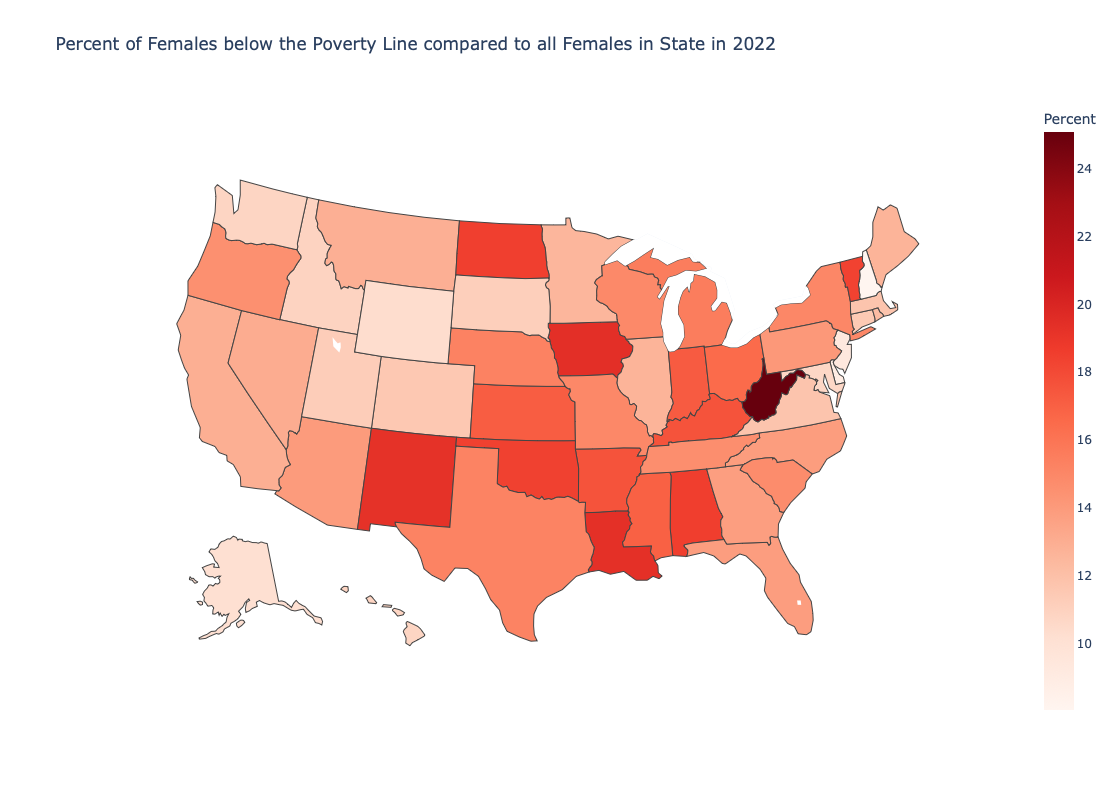

In [166]:
country_graph_single_year(df_states_2022,
                          df_states_2022['female_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Percent of Females below the Poverty Line compared to all Females in State',
                          'Percent','Reds')

Immediately what stands out is West Virginia having a 25.06% poverty rate for women, as it stands nearly 6% higher than the next highest rate of Iowa at 19.38%.  What is starting to appear consistent is actualy that West Virginia has a noteably higher poverty rate than much of the rest of the country.  Let's take a look at males to see if that hypothesis holds up.

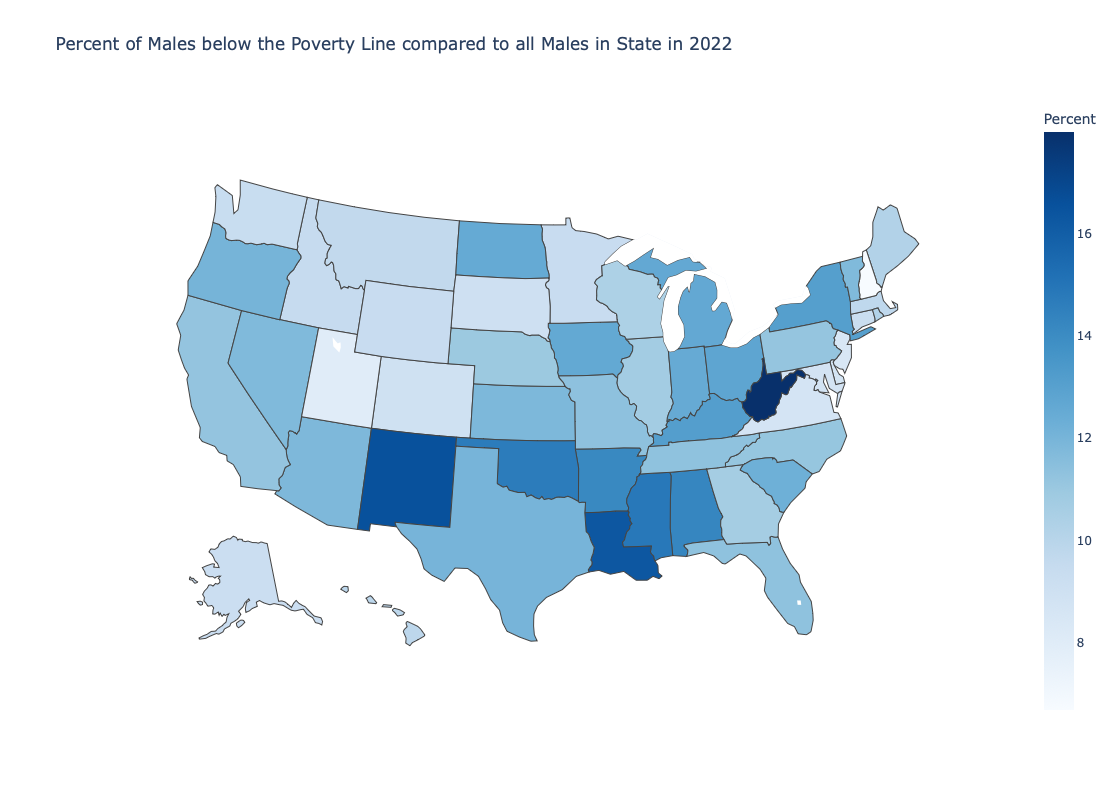

In [169]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['male_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Percent of Males below the Poverty Line compared to all Males in State',
                          'Percent','Blues')

Interestingly enough, West Virginia with 17.97% continues to be inordinately higher in its poverty rate among its total population and its gender subsets than other states.  That said, the next closest is New Mexico with 16.54%, which is only a roughly 1.5% difference for male poverty rates.  This is far closer between first and second highest than the female poverty rates, which were not only higher, but also more spread out.

That said, we've been looking at the highest poverty rates.  If we take a look at the lowest, we see New Hampsire doing quite well with 6.68% of men and 8.04% of women respectively below the poverty line, a difference of roughly 1.3%.  The takeaway from this is that the floor for poverty rates among subsets does seem to condense, whereas the ceiling for poverty rates and expand and have a larger, more varied spread between states.

That was one subset.  Now let's take a look the other: age.  We'll post the maps in the following order:
1. Below the age of 18
2. Between the ages of 18 and 64 (inclusive)
3. Over the age of 64

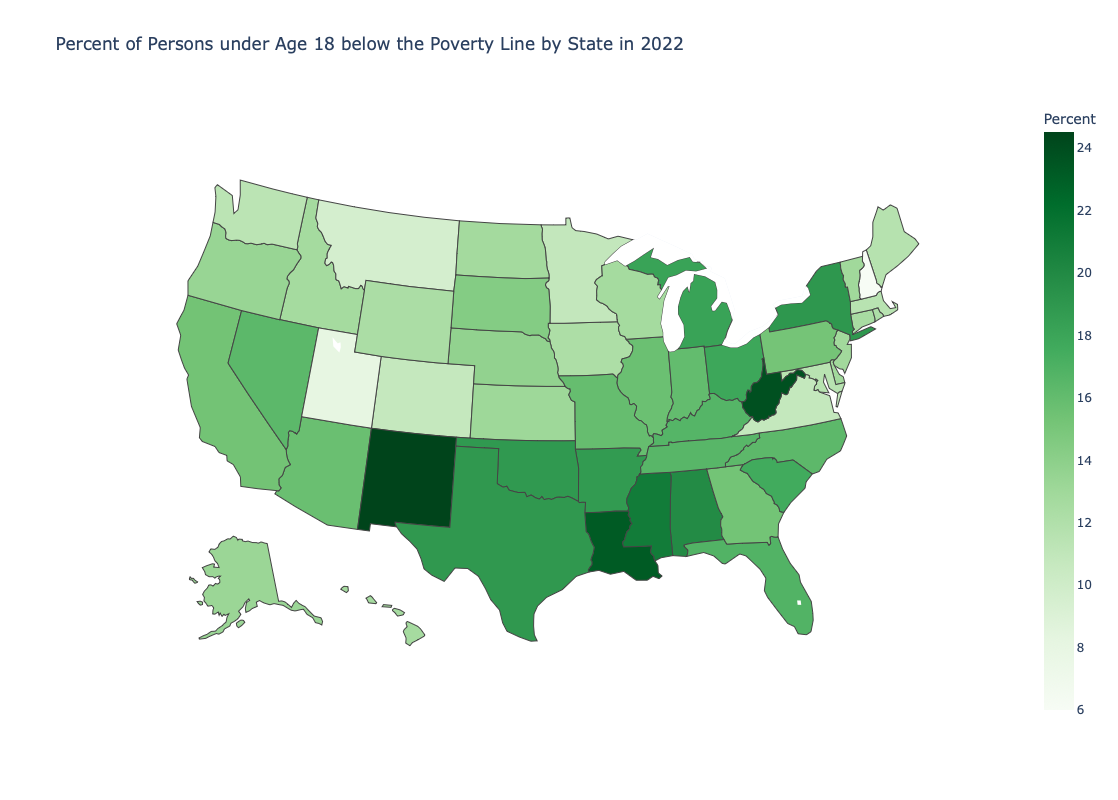

In [176]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['under_18_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Percent of Persons under Age 18 below the Poverty Line by State',
                          'Percent','Greens')

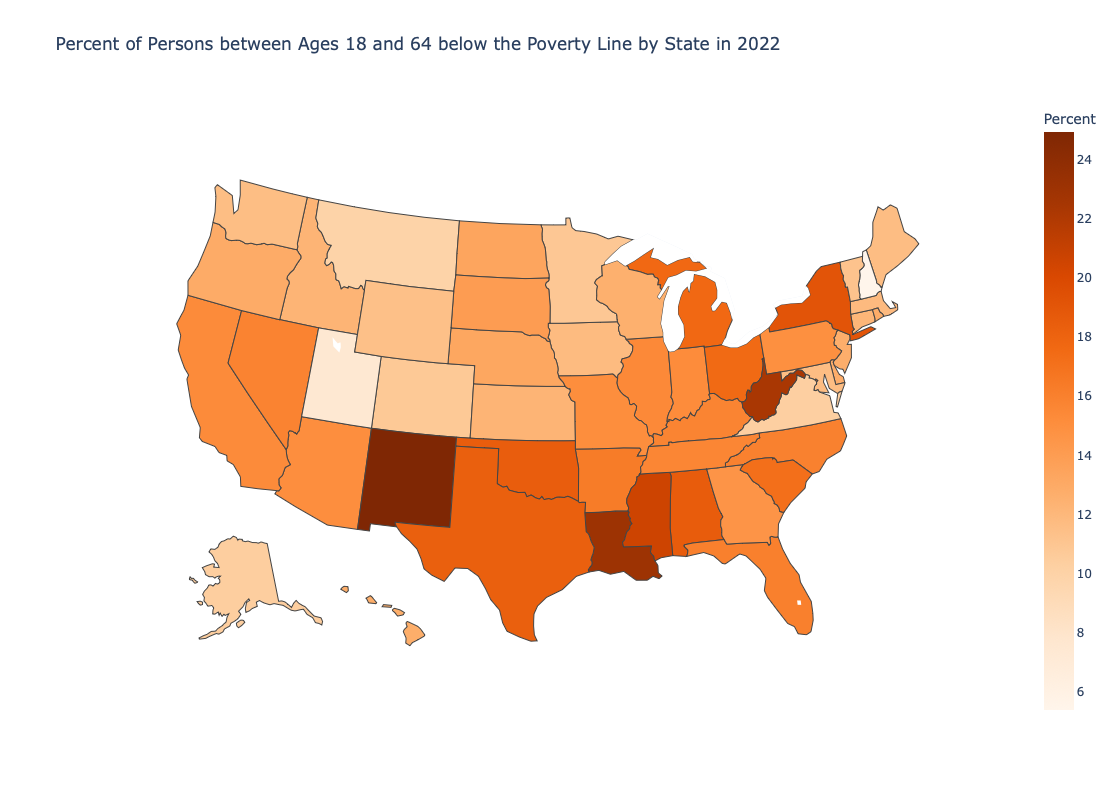

In [178]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['18_to_64_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Percent of Persons between Ages 18 and 64 below the Poverty Line by State',
                          'Percent','Oranges')

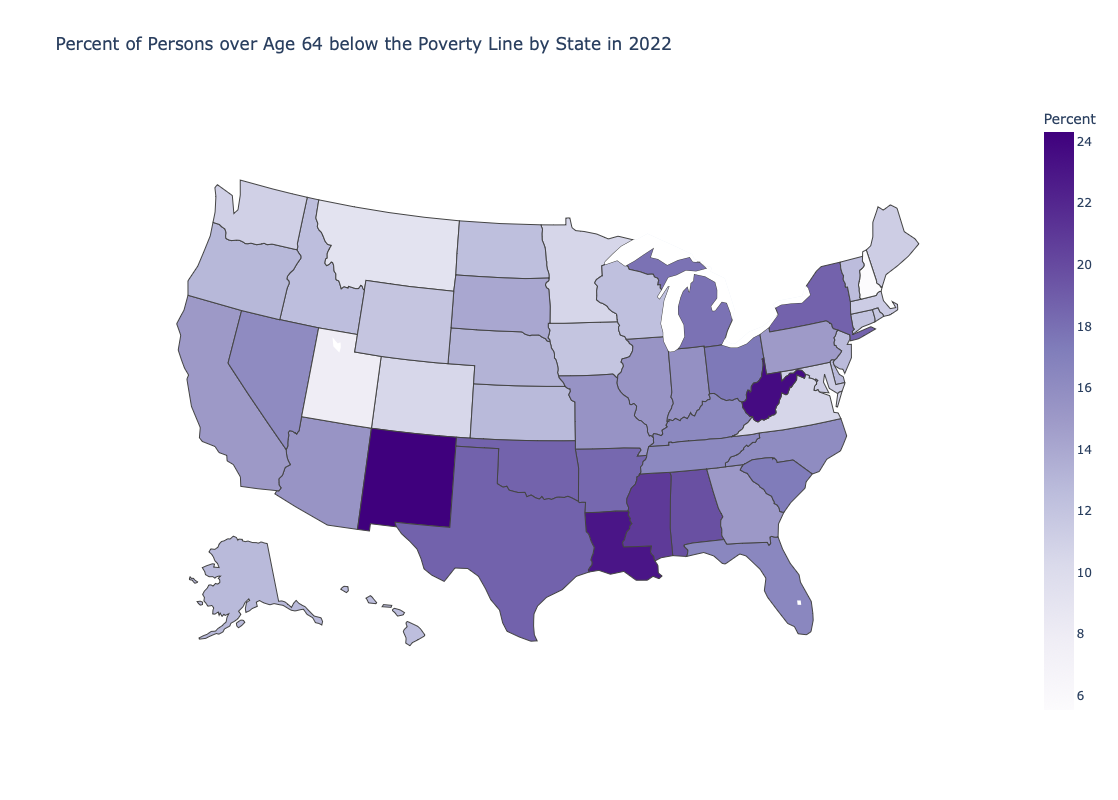

In [180]:
country_graph_single_year(df_states_2022, 
                          df_states_2022['over_64_pov_ratio'].apply(lambda x: np.round(x*100, 2)), 
                          'Percent of Persons over Age 64 below the Poverty Line by State',
                          'Percent','Purples')

I am frankly surprised at how, for the most part, the distribution of those below the poverty line is between age brackets and the states.  There is some tonal shifting for the states with rates between the top and bottom, but those in the top and bottom were far more consistent than with gender.  This implies that there is far less of a correlation and significance of age and poverty.  And instead, gender appears to be far more significant in that regard.

# Results

## Objectives 1

Since we have no clear relationship what-so-ever, it is pointless to examine those 4 thoughts, as the aggregates would not have much meaning. This is possibly because we are looking at the population for which poverty can be determined, and that did not necessarily move in the same way the population growth moved. We likely would have had better information if we had used the true population and compared that to the poverty growth. 

## Objectives 2


Because we determined that there is no significant correlation between our variables, there is no trend or correlation to speak of in a wider sense.  That said, we can look at the variables presented in our maps and draw attention to the states with the highest and lowest poverty rates.  As a reminder of our sub-objectives, here they are:

1. High poverty and high population rates

2. High poverty and low population rates

3. Low poverty and high population rates

4. Low poverty and low population rates

For Objective 2.1, the highest poverty rate among the top four states by population is New York at 14.36%, which is on the higher end of the rates, but still within 1 standard deviation away from the center.  Just looking at the data for 2022, the poverty rate among subsets is roughly equal.  So from a purely statistical perspective, it would appear that there must likely be some overarching cause that affects all ages and genders to increase poverty compared to the other top four states in population.  This would warrant further investigation in prior years to seek out trends.

Moving onto Objective 2.2, West Virginia is the state with the highest poverty rate among its total population as well as all subset populations.  One possible reason for that is a decrease in coal industry jobs as green energy continues to grow and be increasingly subsidized by the federal government.  West Virginia has lost roughly 40% of its coal workforce in the last 11 years (reference: https://www.statista.com/statistics/215786/coal-mining-employment-in-west-virginia/).  If those workers had little else in the way of employment in their area, then this drop in employment among coal workers would contribute to the higher-than-average poverty rate.  The next two states, New Mexico and Louisiana, are not as easy to specify an exact cause of an increase in poverty.

With Objective 2.3, there isn't a state with a "high" (or above the average) population with a "low" (or below the avergage) poverty rate.  The closest may be Washington or Utah, but they fit better in the last objective.

Finally, for Objective 2.4, we found two states with relatively low populations and similarly low poverty rates: New Hampshire and Utah.  These states, in just about every subset, have the lowest rates of poverty (except for Utah and the female poverty rate).  There does not appear to be a singular reason as to why this would be the case for these two states, but it may be an indicator of a good place to live and work, with the possible exception of women since the poverty rate is better but not best.




# References

1. Joe Hasell, Max Roser, Esteban Ortiz-Ospina and Pablo Arriagada (2022) - “Poverty”
Published online at OurWorldInData.org. Retrieved from:
'https://ourworldindata.org/poverty' [Online Resource]

2. “Data Page: Share of population living in extreme poverty”, part of the following
publication: Joe Hasell, Max Roser, Esteban Ortiz-Ospina and Pablo Arriagada (2022) -
“Poverty”. Data adapted from World Bank Poverty and Inequality Platform. Retrieved
from https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty [online
resource]

3. Bureau, U. C. (2021, November 22). Income & Poverty Visualizations. Census.gov.
https://www.census.gov/topics/income-poverty/library/visualizations.html


# Datasets used for our project

- United States Census Bureau. S1701 Poverty Status in the Past 12 Months. Date
published 7/1/2023. 2012 - 2022 (excluding 2020). Date accessed 6/16/2024.

- United States Census Bureau. S0101 Age and Sex. Date published 7/1/2023. 2012 -
2022 (excluding 2020). Date accessed 6/16/2024.
  